In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
balls=pd.read_csv("IPL_Ball.csv")
games=pd.read_csv("IPL_Matches.csv")
df=pd.merge(balls,games,on="id")

In [20]:
# Find Top 5 batsmen in IPL
top=df.groupby("batter")['batsman_runs'].sum().nlargest()
top

batter
V Kohli      8014
S Dhawan     6769
RG Sharma    6630
DA Warner    6567
SK Raina     5536
Name: batsman_runs, dtype: int64

['V Kohli', 'S Dhawan', 'RG Sharma', 'DA Warner', 'SK Raina']
[np.int64(8014), np.int64(6769), np.int64(6630), np.int64(6567), np.int64(5536)]


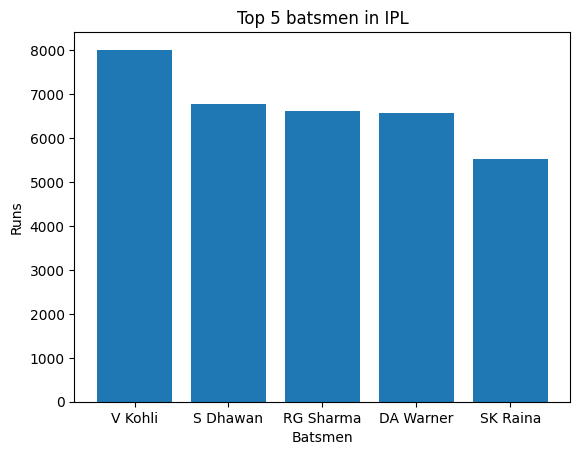

In [9]:
print(list(top.index))  # TO get the indexes
print(list(top.values)) # To get the values

# Plotting
plt.bar(list(top.index),list(top.values))
plt.xlabel('Batsmen')
plt.ylabel('Runs')
plt.title("Top 5 batsmen in IPL")
plt.show()

In [15]:

# Top 5 Bowlers in IPL
rules=["run out",  "retired hurt", "obstructing the field","retired out"]
wick=df[~df['dismissal_kind'].isin(rules)].groupby("bowler")['is_wicket'].sum().nlargest()
wick



bowler
YS Chahal    205
PP Chawla    192
DJ Bravo     183
B Kumar      181
R Ashwin     180
Name: is_wicket, dtype: int64

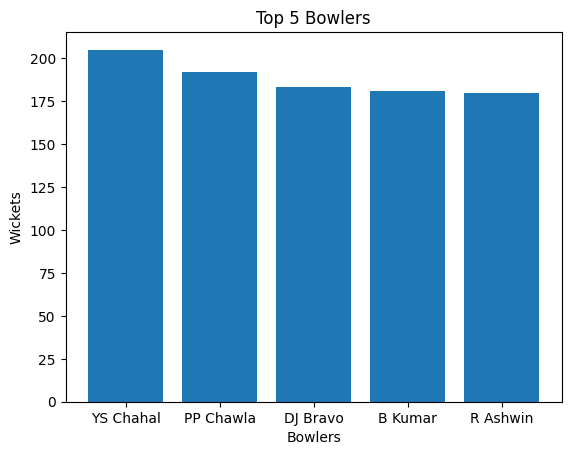

In [19]:
plt.bar(list(wick.index),list(wick.values))
plt.xlabel("Bowlers")
plt.ylabel("Wickets")
plt.title("Top 5 Bowlers")
plt.show()

In [ ]:
#Q Orange Cap winner of IPL seasons

# Need to convert date into proper format
df['date']=pd.to_datetime(df['date'],format="mixed") 
df['season']=pd.DatetimeIndex(df['date']).year
print(df['season'])

oc={"Season":None,"OC":None}
for season in df['season'].unique():
    ocw=df[df['season']==season].groupby('batter')['batsman_runs'].sum().nlargest(1)
    oc[season]=[ocw.index[0],ocw.values[0]]
oc_df=pd.DataFrame(oc)
oc_df

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
260915    2024
260916    2024
260917    2024
260918    2024
260919    2024
Name: season, Length: 260920, dtype: int32


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,SE Marsh,ML Hayden,SR Tendulkar,CH Gayle,CH Gayle,MEK Hussey,RV Uthappa,DA Warner,V Kohli,DA Warner,KS Williamson,DA Warner,KL Rahul,RD Gaikwad,JC Buttler,Shubman Gill,V Kohli
1,616,572,618,608,733,733,660,562,973,641,735,692,676,635,863,890,741


In [ ]:
df.groupby(['season','batter'])['batsman_runs'].sum()

In [ ]:
# Plot a graph of Virat kohlis performance per season

